# Fourier point source

In [42]:
%load_ext autoreload
%autoreload 2
import site
import sys
site.addsitedir('..')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
import numpy as np
from  matplotlib import pyplot as plt
from src.utils import *
from src.projection import project, rotate
from src.interpolate import *

## Important: in Fourier domain, the point is rotated in the fftshifted coordinates (i.e. 0 in the centre) - working now
Now it's working, no need to do it step by step from the next header

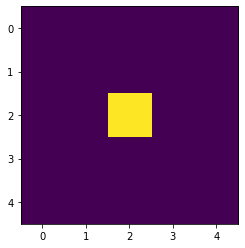

In [44]:
nx = 5
dx = 0.2

v = np.zeros([nx,nx,nx])
v[2,2,1] = 1
#v[1,1,0] = 1

plt.imshow(v[:,:,1])

In [45]:
x_freq = np.fft.fftfreq(nx, dx)
y_freq = np.fft.fftfreq(nx, dx)
z_freq = np.fft.fftfreq(nx, dx)

X, Y, Z = np.meshgrid(x_freq, y_freq, z_freq, indexing = 'xy')

### Do the steps in project

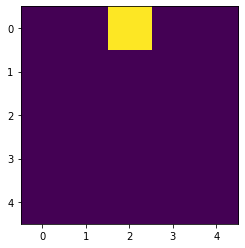

In [50]:
nx = 5
dx = 0.2

v = np.zeros([nx,nx,nx])
v[0,2,2] = 1

x_freq = np.fft.fftfreq(nx, dx)
y_freq = np.fft.fftfreq(nx, dx)
z_freq = np.fft.fftfreq(nx, dx)

X, Y, Z = np.meshgrid(x_freq, y_freq, z_freq, indexing = 'xy')

plt.imshow(v[:,:,2])

In [51]:
angles = np.array([0,0,np.pi/4])
X_r, Y_r,Z_r = rotate(X, Y, Z, angles)
slice_coords = np.array([X_r[:,:,0].flatten(), Y_r[:,:,0].flatten(), Z_r[:,:,0].flatten()])

In [52]:
slice_interp = interpolate(slice_coords, x_freq, y_freq, z_freq, np.fft.ifftshift(v),"tri")
slice_interp_2d = np.fft.fftshift(slice_interp.reshape(X_r.shape[0], X_r.shape[1]))

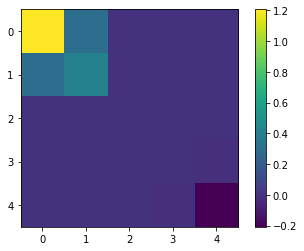

In [53]:
plt.imshow(slice_interp_2d); plt.colorbar()

In [54]:
slice_interp_2d

array([[ 1.20710678,  0.3017767 ,  0.        ,  0.        ,  0.        ],
       [ 0.3017767 ,  0.41421356,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.00888348],
       [ 0.        ,  0.        ,  0.        , -0.00888348, -0.20710678]])